In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(2343243)  #so that everytime, I run the code, I get the same data.

In [3]:
mean_vec1 = np.array([0, 0, 0])  #mean 
cov_mat1 = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])  #covariance matrix
class1 = np.random.multivariate_normal(mean_vec1, cov_mat1, 100)  #class 1 is of 100 points.

In [4]:
mean_vec2 = np.array([1, 1, 1])  #mean 
cov_mat2 = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])  #covariance matrix
class2 = np.random.multivariate_normal(mean_vec2, cov_mat2, 100)  #class 2 is of 100 points.

In [5]:
from mpl_toolkits.mplot3d import Axes3D, proj3d

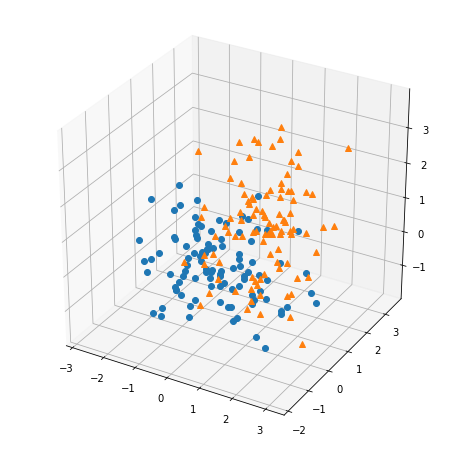

In [6]:
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(111, projection = '3d')  #adding subplot to 1*1 grid at 1st position
ax.plot(class1[:, 0], class1[:, 1], class1[:, 2], 'o')
ax.plot(class2[:, 0], class2[:, 1], class2[:, 2], '^')
plt.show()

# Moving the 3D data to 2D data

In [7]:
all_data = np.concatenate((class1, class2))

# Creating covariance matrix

In [8]:
cov = np.cov(all_data)

In [9]:
cov

array([[ 0.17109683, -0.17167938, -0.28888615, ...,  0.14389585,
         0.22349659,  0.12710293],
       [-0.17167938,  1.63877557, -0.3698681 , ..., -0.48910082,
        -0.12645324,  0.23481963],
       [-0.28888615, -0.3698681 ,  0.78456144, ..., -0.08788247,
        -0.42135894, -0.37761759],
       ...,
       [ 0.14389585, -0.48910082, -0.08788247, ...,  0.20204724,
         0.16497542,  0.02172165],
       [ 0.22349659, -0.12645324, -0.42135894, ...,  0.16497542,
         0.29846695,  0.19019534],
       [ 0.12710293,  0.23481963, -0.37761759, ...,  0.02172165,
         0.19019534,  0.18395425]])

In [10]:
cov.shape  #Looking at the shape,it seems that the covariance is taken between the datapoints, not between the features.

(200, 200)

In [11]:
#So transpose the matrix to find the covariance between features, not between datapoints
all_data_t = all_data.T
cov = np.cov(all_data_t)
cov.shape

(3, 3)

# Finding eigen vectors and eigen values

In [12]:
eig_val, eig_vector = np.linalg.eig(cov)
eig_val, eig_vector

(array([1.45186534, 1.07866114, 0.8449361 ]),
 array([[ 0.41124564,  0.91063567,  0.0402454 ],
        [ 0.64810013, -0.26106644, -0.71540934],
        [ 0.64097055, -0.32029202,  0.69754554]]))

# Sorting the eigen values

In [13]:
eig_val_vector_pair = []  #this stores the eigen values along with the eigen vectors
for i in range(len(eig_val)):
    eig_vec = eig_vector[:, i]  #as eigen vectors are present column wise
    eig_val_vector_pair.append([eig_val[i], eig_vec])
    
#sorting the array in descending order
eig_val_vector_pair.sort(reverse = True)

eig_val_vector_pair

[[1.4518653417359286, array([0.41124564, 0.64810013, 0.64097055])],
 [1.0786611401978583, array([ 0.91063567, -0.26106644, -0.32029202])],
 [0.8449360955327045, array([ 0.0402454 , -0.71540934,  0.69754554])]]

# How to find what no of features to be kept?

In [33]:
from sklearn import decomposition
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

sc = StandardScaler()
X_std = sc.fit_transform(X) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

pca = decomposition.PCA()    #first apply PCA for all features
pca.fit_transform(X_train)

array([[ 2.24296243e+02, -4.96797431e+01, -8.49635679e+00, ...,
         2.52775010e-03,  1.97054114e-04,  1.53292183e-04],
       [-2.81441090e+02,  1.10738644e+00,  1.67063977e+01, ...,
        -1.55861759e-03, -2.69558277e-03,  7.92968782e-04],
       [ 1.33243175e+03, -2.45122642e+02, -8.27577270e+00, ...,
         1.78234104e-03, -2.44700078e-04,  1.83746106e-05],
       ...,
       [-1.88111289e+02,  8.03198963e+01, -2.11896801e+01, ...,
         9.08423971e-04, -2.96379403e-04, -3.27544056e-05],
       [-4.73391753e+01, -4.50230815e+01, -1.89792341e+01, ...,
        -2.40867899e-04,  1.15842356e-06, -6.33275101e-04],
       [-3.95819321e+02,  4.33063350e+00, -3.13751048e+00, ...,
         2.82944235e-04,  4.42861538e-04, -1.34670950e-04]])

In [36]:
variance = pca.explained_variance_
total_var = sum(variance)

k = 0
current_var = 0
while current_var/total_var < 0.95 :  #means we want to keep only 99% of the variance after PCA
    current_var += variance[k]
    k = k + 1
    
print(k)

1


In [37]:
pca = decomposition.PCA(n_components = k)    #now apply PCA for k features
pca.fit_transform(X_train)

array([[ 2.24296243e+02],
       [-2.81441090e+02],
       [ 1.33243175e+03],
       [-3.33840703e+02],
       [-3.85203015e+02],
       [-5.62615231e+02],
       [-5.03980443e+02],
       [ 5.29467230e+02],
       [-2.12857637e+02],
       [-6.70946297e+02],
       [ 6.26464725e+02],
       [-4.81865553e+02],
       [-3.71575507e+01],
       [-8.24305452e+02],
       [ 8.89040166e+02],
       [-2.27662333e+02],
       [ 9.65762702e+02],
       [ 1.25938453e+03],
       [-4.73882612e+02],
       [-3.90032211e+02],
       [-2.42675631e+02],
       [-7.89599810e+01],
       [-6.30990005e+02],
       [-7.12966282e+02],
       [-5.60807700e+02],
       [-5.71744490e+02],
       [-1.12989545e+02],
       [-6.08642388e+02],
       [-3.56456834e+02],
       [-5.69798170e+02],
       [-5.26918598e+02],
       [-4.12302787e+02],
       [ 8.27285860e+01],
       [-7.75395800e+01],
       [ 1.26208828e+03],
       [ 4.38704812e+02],
       [-3.25085833e+02],
       [-6.80500346e+02],
       [ 1.7